## End TO End Salary Prediction

Mechine Learning Life cycle:

1. Understnd Data
2. Data Collection
3. Data Clean
4. EDA
5. Data Preprocesssing
6. Model Train
7. Model evaluate

# Undertand problem statement
Prediction task is to determine whether a person makes over 50K a year.

Data Columns:
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15.class: >50k , <=50k

# Basic information

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32560, 15)

In [7]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [8]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.describe(include='O')

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


## observtion 
1. dataset columns need to rename
2. Target column is imbalance
3. No null values in dataset

# Data cleaning

In [10]:
df2=df.copy()

In [11]:

df2.head(2)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
# renaming columns
df2['age']=df['39']
df2['workclass']=df2[' State-gov']
df2['education']=df2[' Bachelors']
df2['matrial']=df2[' Never-married']
df2['occupation']=df2[' Adm-clerical']
df2['relationship']=df2[' Not-in-family']
df2['race']=df2[' White']
df2['sex']=df2[' Male']
df2['work-per-week']=df2[' 40']
df2['country']=df2[' United-States']
df2['salary']=df2[' <=50K']

In [13]:
df2.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [14]:
## drop columns unnesssery columns
drop_cols=df2.iloc[:,:15]
drop_cols

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df2.drop(columns=drop_cols,inplace=True)

In [16]:
df2.head()

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [17]:
df2.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
df2[df2['workclass']==' ?']

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
26,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
60,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
68,25,?,Some-college,Never-married,?,Own-child,White,Male,40,United-States,<=50K
76,67,?,10th,Married-civ-spouse,?,Husband,White,Male,2,United-States,<=50K
105,17,?,10th,Never-married,?,Own-child,White,Female,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32530,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32538,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32540,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [19]:
df2['workclass'].replace({' ?': 'unknown'},inplace=True)

In [20]:
df2.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', 'unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
df2.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
df2['occupation'].replace({' ?': 'unknown'},inplace=True)

In [23]:
df2.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'unknown', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
df2.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [25]:
df2['matrial'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [26]:
df2.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
df2['country'].replace({' ?': 'unknown'},inplace=True)

In [28]:
df2.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'unknown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [29]:
df2.sex.value_counts()

sex
 Male      21789
 Female    10771
Name: count, dtype: int64

In [30]:
df2['relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [31]:
df2['relationship'].replace({' Not-in-family': 'single',' Other-relative':'others'},inplace=True)

In [32]:
df2.head()

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,single,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32560 non-null  int64 
 1   workclass      32560 non-null  object
 2   education      32560 non-null  object
 3   matrial        32560 non-null  object
 4   occupation     32560 non-null  object
 5   relationship   32560 non-null  object
 6   race           32560 non-null  object
 7   sex            32560 non-null  object
 8   work-per-week  32560 non-null  int64 
 9   country        32560 non-null  object
 10  salary         32560 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


## visualization

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
## Univriante analysis
cate_cols=df2.select_dtypes(include='object')
num_cols=df2.select_dtypes(exclude='object')

In [36]:
num_cols

,age,work-per-week
0,50,13
1,38,40
2,53,40
3,28,40
4,37,40
...,...,...
32555,27,38
32556,40,40
32557,58,40
32558,22,20


In [37]:
cate_feature=cate_cols.columns


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


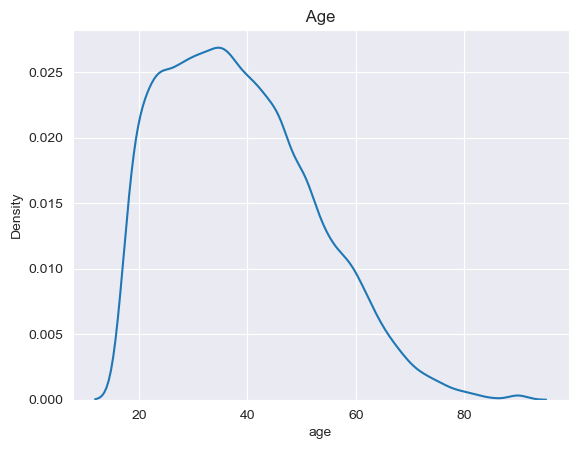

In [38]:
sns.set_style('darkgrid')
plt.Figure(figsize=(15,8))
plt.title( ' Age ')
sns.kdeplot(df2['age'])
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


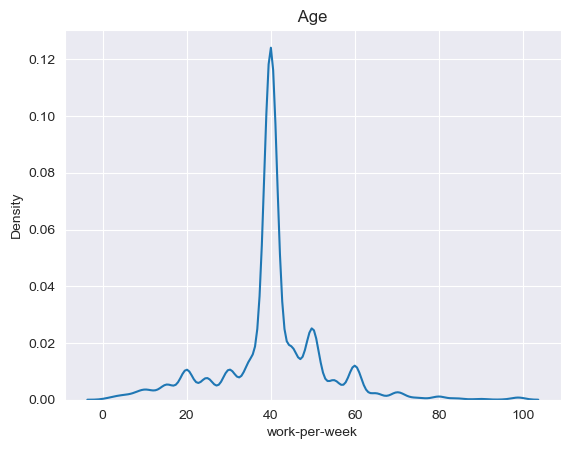

In [39]:
sns.set_style('darkgrid')
plt.Figure(figsize=(15,8))
plt.title( ' Age ')
sns.kdeplot(df2['work-per-week'])
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


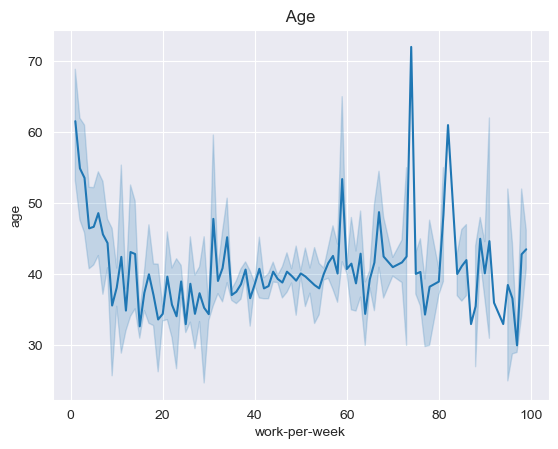

In [40]:
sns.set_style('darkgrid')
plt.Figure(figsize=(15,8))
plt.title( ' Age ')
sns.lineplot(x=df2['work-per-week'],y=df2['age'])
plt.show()

In [41]:
## bivr

# 
# Univariate analysis

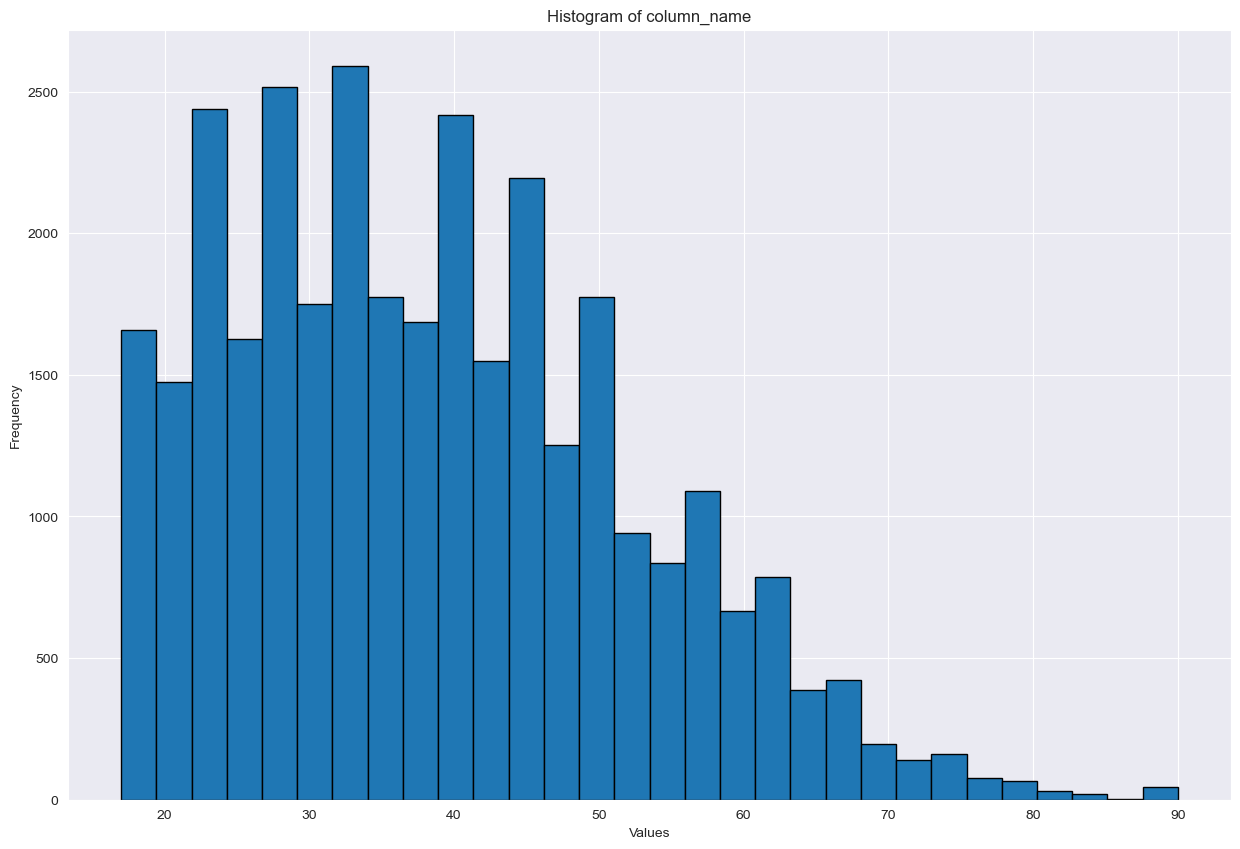

In [42]:
plt.figure(figsize=(15,10))
df2['age'].plot(kind='hist', bins=30, edgecolor='k')
plt.title('Histogram of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='work-per-week'>

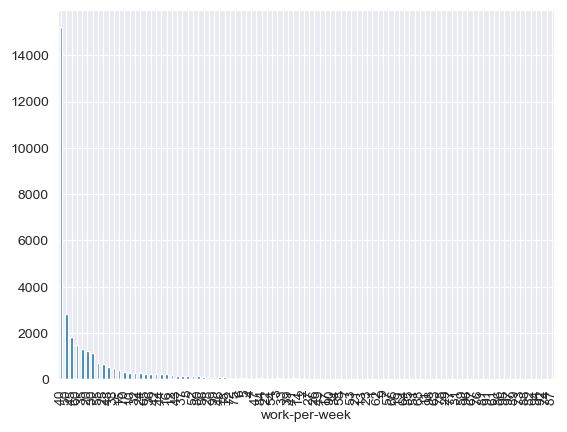

In [43]:
df2['work-per-week'].value_counts().plot(kind='bar')

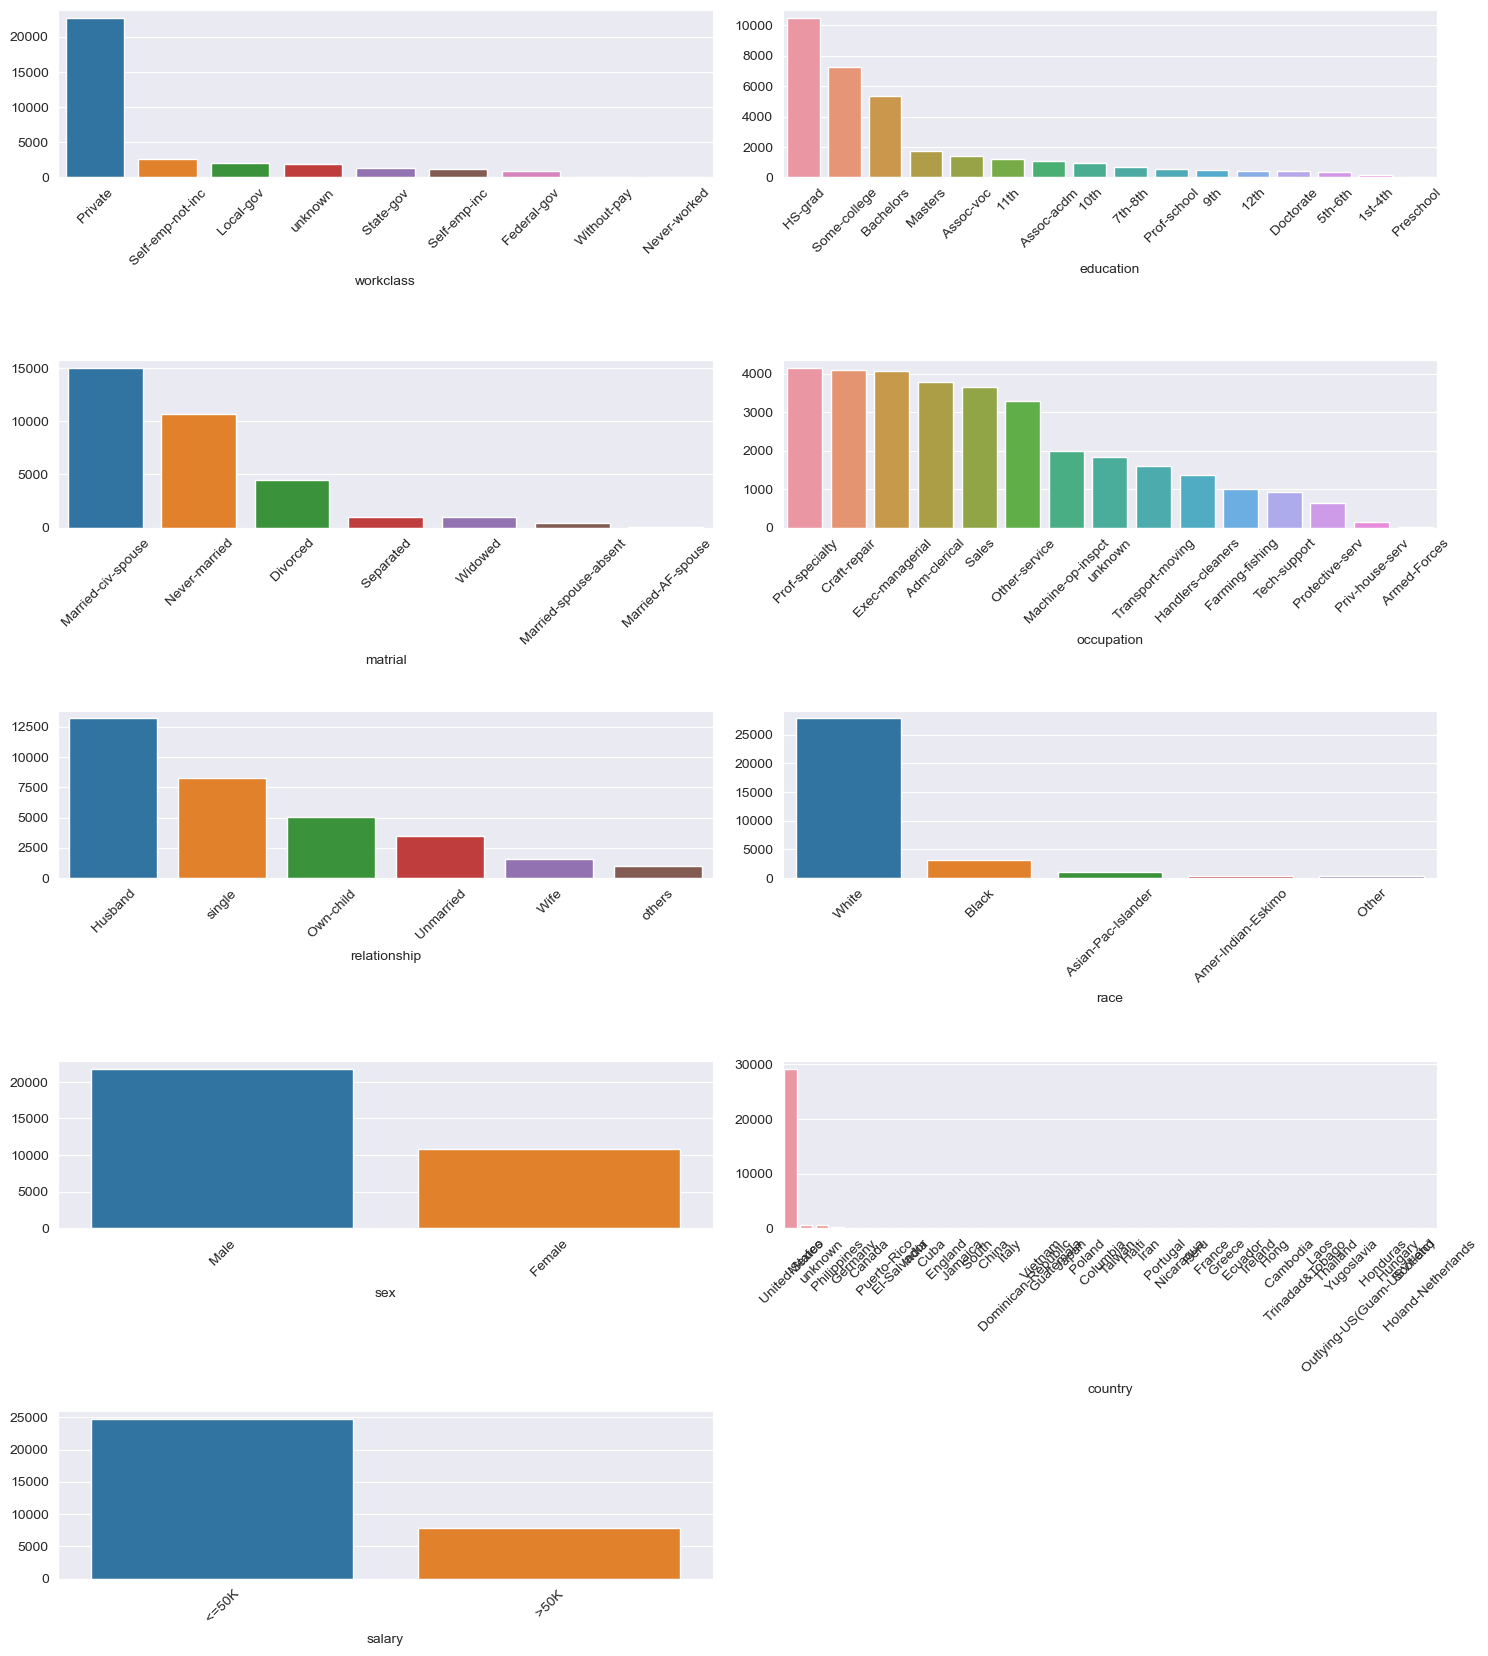

In [44]:
plt.figure(figsize=(15,30))
for i,col in enumerate(cate_cols):
    plt.subplot(9,2,i+1)
    sns.barplot(x=cate_cols[col].value_counts().index, y=cate_cols[col].value_counts().values)
    plt.xticks(rotation=45)
   
plt.tight_layout()
plt.show()

salary              <=50K   >50K
workclass                       
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            17733   4963
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            944    353
 Without-pay           14      0
unknown              1645    191


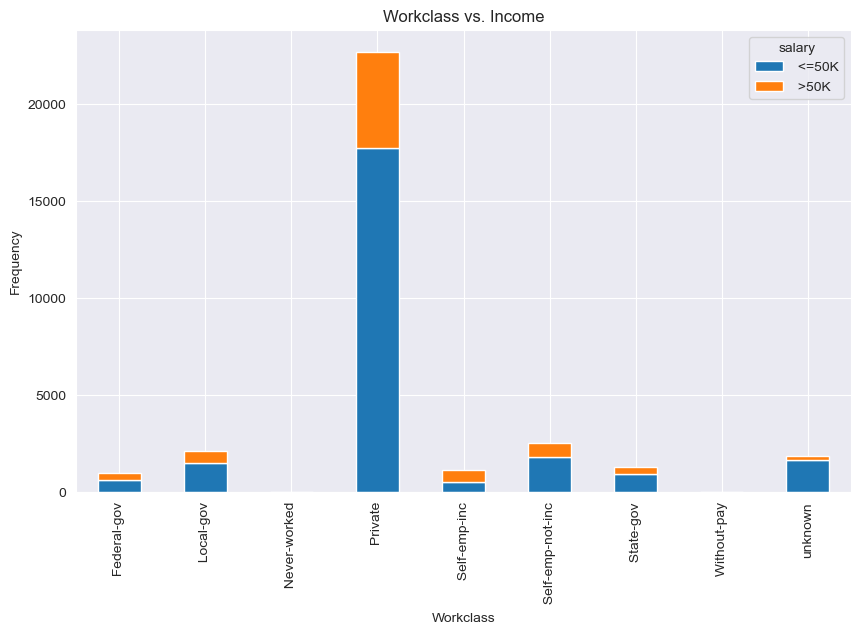

In [45]:
crosstab = pd.crosstab(df2['workclass'], df2['salary'])
print(crosstab)

# Plotting the cross-tabulation
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Workclass vs. Income')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.legend(title='salary')
plt.show()

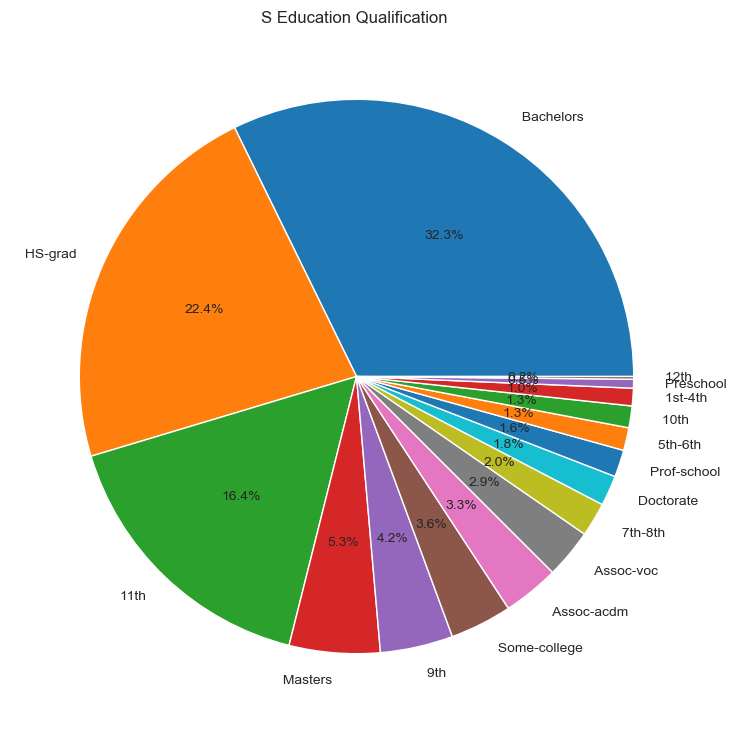

In [46]:
plt.figure(figsize=(15,9))
plt.title('S Education Qualification ')
plt.pie(df2['education'].value_counts(),autopct='%1.1f%%',labels=df2['education'].unique())
plt.show()

In [47]:
df2.columns

Index(['age', 'workclass', 'education', 'matrial', 'occupation',
       'relationship', 'race', 'sex', 'work-per-week', 'country', 'salary'],
      dtype='object')

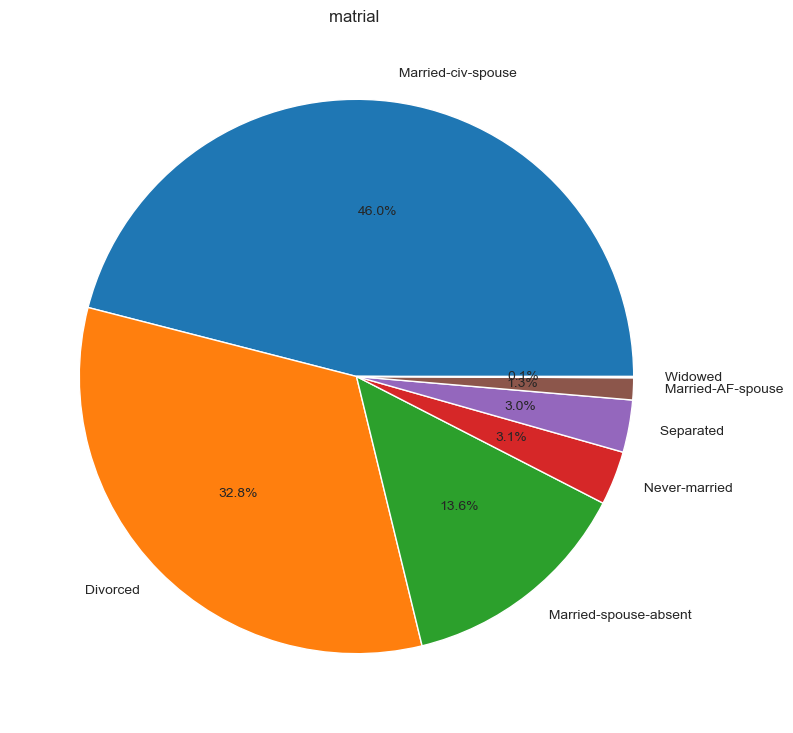

In [48]:
plt.figure(figsize=(15,9))
plt.title('matrial ')
plt.pie(df2['matrial'].value_counts(),autopct='%1.1f%%',labels=df2['matrial'].unique())
plt.show()

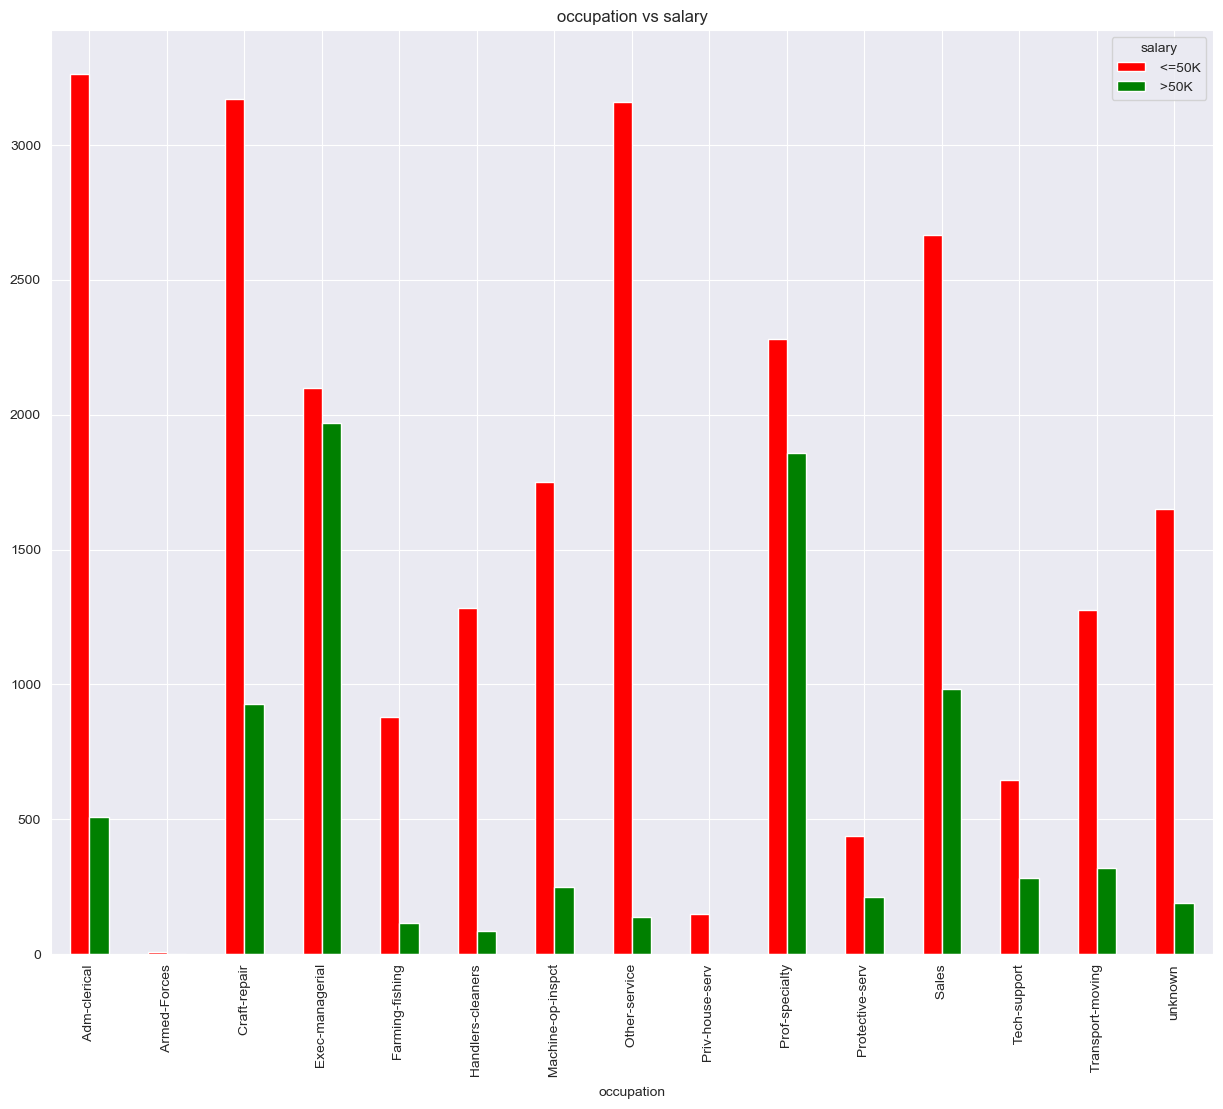

In [49]:

cross=pd.crosstab(df2['occupation'],df2['salary'])
cross.plot(kind='bar',figsize=(15,12),color=['r','g'],title='occupation vs salary')
plt.show()

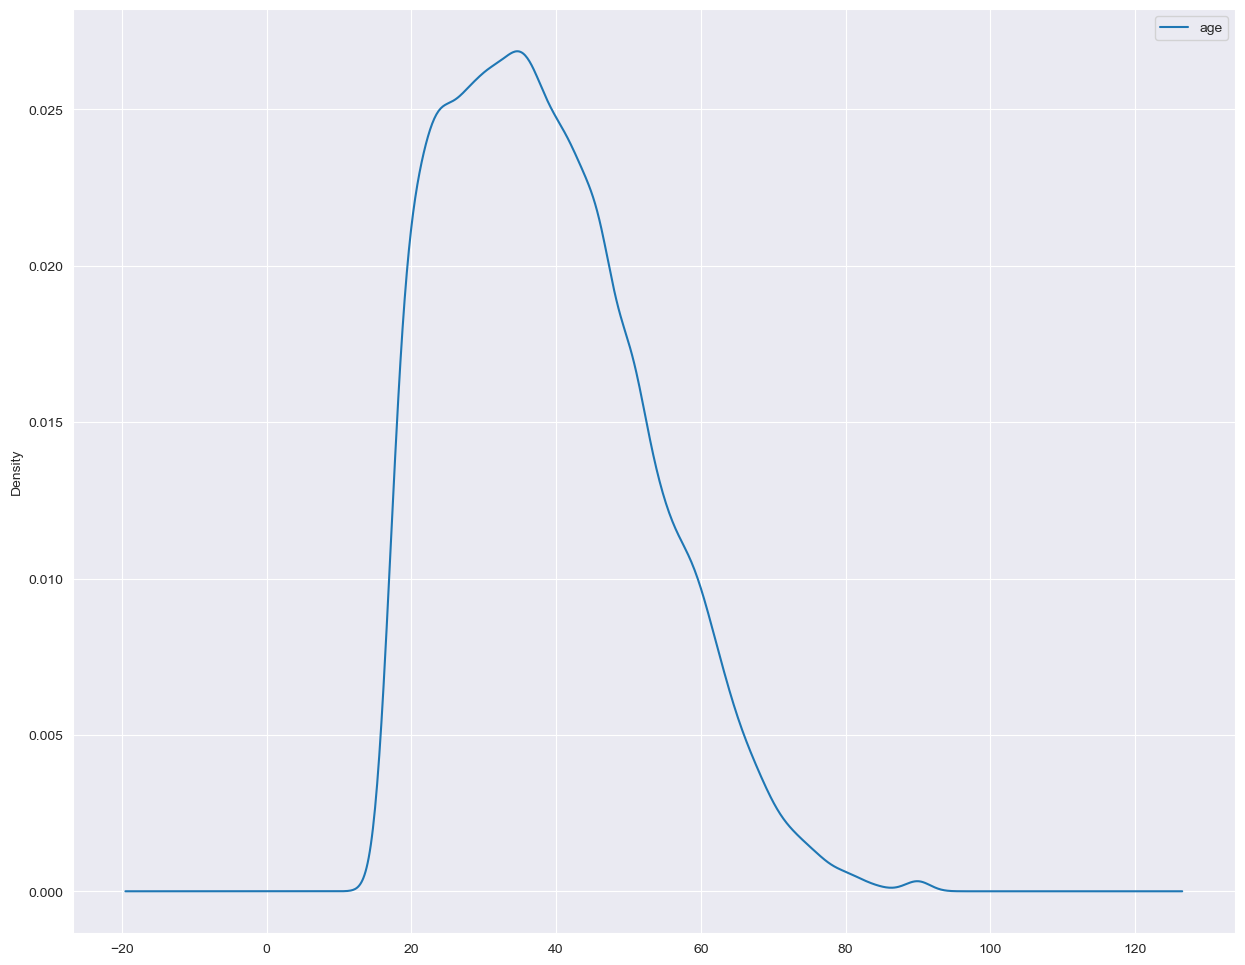

In [50]:
df2[['age','sex']].plot(kind='kde',figsize=(15,12))
plt.show()

<Axes: >

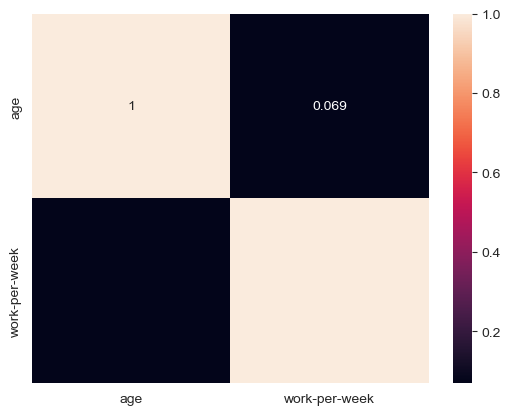

In [51]:
sns.heatmap(num_cols.corr(),annot=True)

<Axes: >

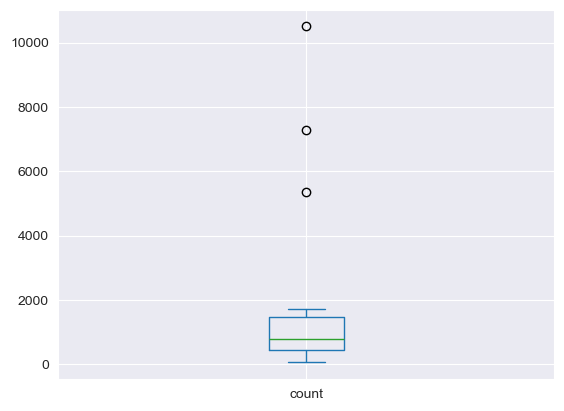

In [52]:
df2['education'].sort_values().value_counts().plot(kind='box')

<Axes: >

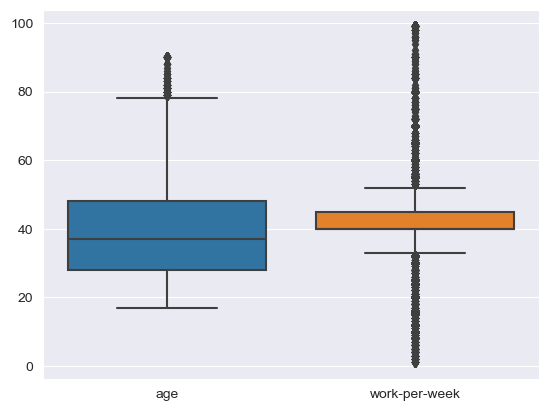

In [53]:
sns.boxplot(df2)

In [56]:
from scipy.stats import chi2_contingency
import numpy as np

In [57]:
chi_test=[]
for col in cate_cols:
    if chi2_contingency(pd.crosstab(df2['salary'],df2[col]))[i]<0.25 :
        chi_test.append('reject null hypothisis')
    else:
        chi_test.append('fail to reject null hypothisis')


IndexError: tuple index out of range

<Axes: xlabel='salary'>

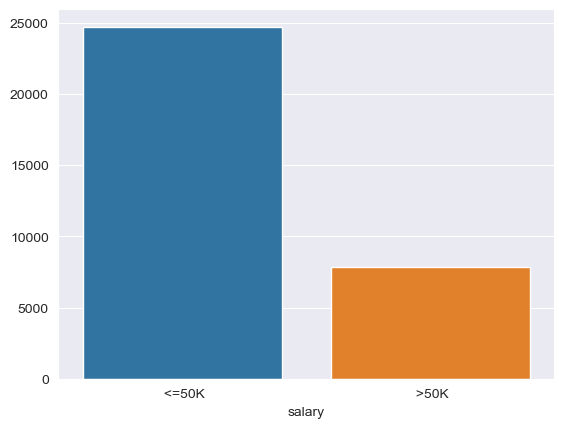

In [61]:
sns.barplot(x=cate_cols['salary'].value_counts().index, y=cate_cols['salary'].value_counts().values)

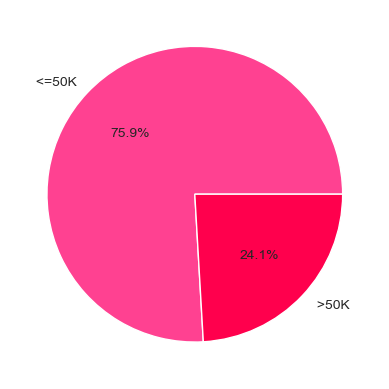

In [67]:
plt.pie(df2['salary'].value_counts(),autopct='%1.1f%%',colors=['#FF4191','#FF004D'],labels=df2['salary'].unique())
plt.show()

In [73]:
df2['education'].values

array([' Bachelors', ' HS-grad', ' 11th', ..., ' HS-grad', ' HS-grad',
       ' HS-grad'], dtype=object)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='education', ylabel='Count'>

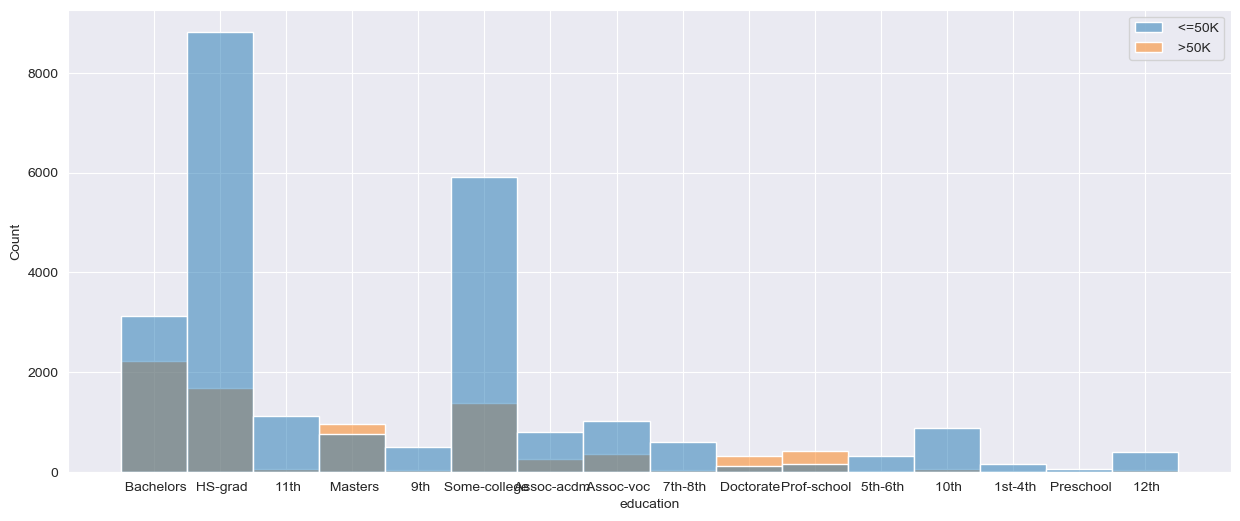

In [77]:
plt.figure(figsize=(15,6))
sns.histplot(data=df2,x='education',hue=df2['salary'].values)

In [78]:
df2.to_csv('data.csv')